<a href="https://colab.research.google.com/github/kv2011/DHC/blob/main/PC503_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
cd D:\M.Tech Sem 1\Programming\Project

D:\M.Tech Sem 1\Programming\Project


In [ ]:
df=pd.read_csv("churn_data.csv")

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df=df.drop("customerID",axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Replace any non-numeric values in 'TotalCharges' with NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df["TotalCharges"].fillna(0, inplace=True)  # Replace NaNs with 0

In [ ]:
df.shape

(7043, 20)

In [ ]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df["TotalCharges"]=pd.to_numeric(df["TotalCharges"])

In [ ]:
df["TotalCharges"].dtype

dtype('float64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
MonthlyCharges_Churn_no=df[df["Churn"]=="No"].MonthlyCharges
MonthlyCharges_Churn_yes=df[df["Churn"]=="Yes"].MonthlyCharges

Visulization

Text(0.5, 1.0, 'Density Plot of Monthly Charges by Churn')

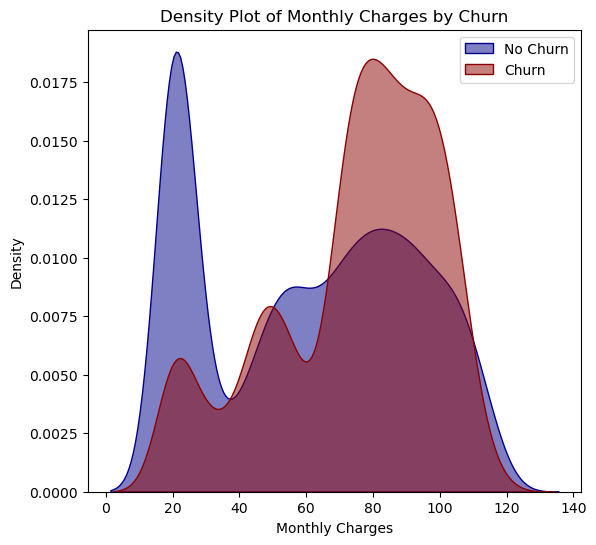

In [ ]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1);
sns.kdeplot(MonthlyCharges_Churn_no, label="No Churn", color="darkblue", fill=True, alpha=0.5);
sns.kdeplot(MonthlyCharges_Churn_yes, label="Churn", color="darkred", fill=True, alpha=0.5);
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.legend()
plt.title("Density Plot of Monthly Charges by Churn")

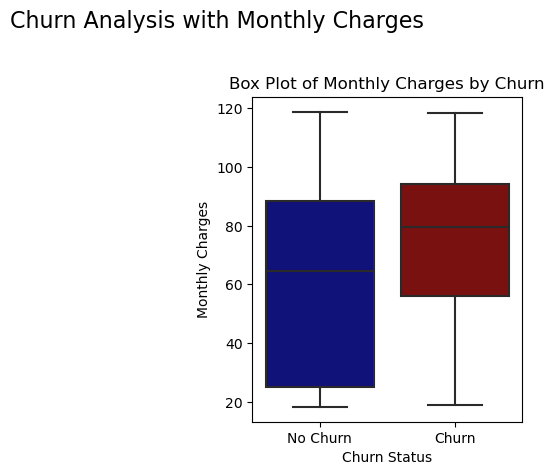

In [ ]:
plt.subplot(1, 2, 2)
sns.boxplot(data=[MonthlyCharges_Churn_no, MonthlyCharges_Churn_yes], palette=["darkblue", "darkred"])
plt.xticks([0, 1], ["No Churn", "Churn"])
plt.xlabel("Churn Status")
plt.ylabel("Monthly Charges")
plt.title("Box Plot of Monthly Charges by Churn")

plt.suptitle("Churn Analysis with Monthly Charges", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
Tenure_CHurn_no=df[df["Churn"]=="No"].tenure
Tenure_CHurn_yes=df[df["Churn"]=="Yes"].tenure

Text(0.5, 1.0, 'Churn With tenure')

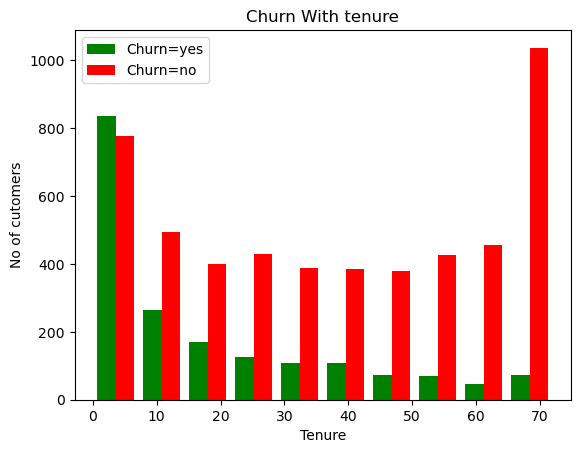

In [ ]:
plt.hist([Tenure_CHurn_yes,Tenure_CHurn_no],color=["green","red"],label=["Churn=yes","Churn=no"])
plt.xlabel("Tenure")
plt.ylabel("No of cutomers")
plt.legend()
plt.title("Churn With tenure")


In [ ]:
TotalCharges_Churn_yes=df[df["Churn"]=="Yes"].TotalCharges
TotalCharges_Churn_no=df[df["Churn"]=="No"].TotalCharges

Text(0.5, 1.0, 'Churn With Total Charges')

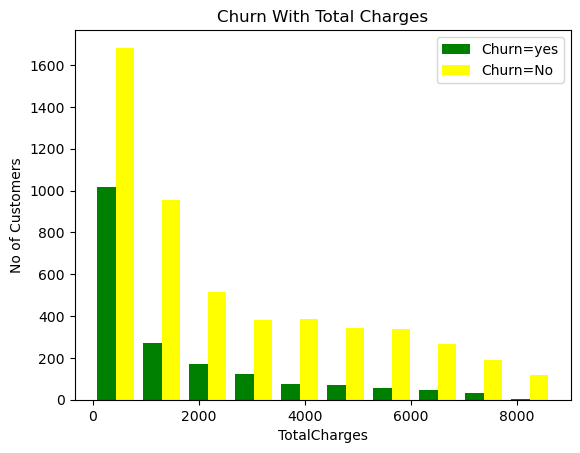

In [ ]:
plt.hist([TotalCharges_Churn_yes,TotalCharges_Churn_no],color=["green","yellow"],label=["Churn=yes","Churn=No"])
plt.xlabel("TotalCharges")
plt.ylabel("No of Customers")
plt.legend()
plt.title("Churn With Total Charges")

In [ ]:
for i in df.columns:
    if df[i].dtypes=="object":
        print(i,":",df[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
Col_to_be_renamed=["StreamingMovies","StreamingTV","TechSupport","DeviceProtection","OnlineBackup","OnlineSecurity"]

In [ ]:
for i in Col_to_be_renamed:
    if 'No internet service' in df[i].unique():
        df[i].replace('No internet service',"No",inplace=True)

In [ ]:
for j in Col_to_be_renamed:
 print(j,":",df[j].unique())

StreamingMovies : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
TechSupport : ['No' 'Yes']
DeviceProtection : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
OnlineSecurity : ['No' 'Yes']


In [ ]:
for i in df.columns:
     if df[i].dtypes=="object":
         print(i,":",df[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df["MultipleLines"]=df["MultipleLines"].astype("str")

In [ ]:
df["MultipleLines"].replace('No phone service',"No",inplace=True)

In [ ]:
for i in df.columns:
     if df[i].dtypes=="object":
         print(i,":",df[i].unique())

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [ ]:
df["gender"]=df["gender"].apply(lambda x:0 if x=="Female" else 1)

In [ ]:
df["gender"].value_counts()

gender
1    3555
0    3488
Name: count, dtype: int64

In [ ]:
for column in df:
     print(column,":",df[column].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [ ]:
yes_no = ["Partner", "Dependents", "Churn", "PaperlessBilling", "StreamingMovies",
          "StreamingTV", "TechSupport", "DeviceProtection", "TechSupport",
          "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
          "PaymentMethod", "MonthlyCharges", "TotalCharges"]


In [ ]:
# Assuming `df` is your DataFrame
df_yes_no = df[yes_no]

In [ ]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
for i in yes_no:
     df[i]=df[i].apply(lambda x:1 if x=="Yes" else 0)

In [ ]:
for column in df:
 print(column,":",df[column].unique())

gender : [0 1]
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : [0 1]
TechSupport : [0]
StreamingTV : [0]
StreamingMovies : [0]
Contract : [0]
PaperlessBilling : [0]
PaymentMethod : [0]
MonthlyCharges : [0]
TotalCharges : [0]
Churn : [0 1]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7043 non-null   int64 
 1   SeniorCitizen     7043 non-null   int64 
 2   Partner           7043 non-null   int64 
 3   Dependents        7043 non-null   int64 
 4   tenure            7043 non-null   int64 
 5   PhoneService      7043 non-null   object
 6   MultipleLines     7043 non-null   object
 7   InternetService   7043 non-null   object
 8   OnlineSecurity    7043 non-null   object
 9   OnlineBackup      7043 non-null   object
 10  DeviceProtection  7043 non-null   int64 
 11  TechSupport       7043 non-null   int64 
 12  StreamingTV       7043 non-null   int64 
 13  StreamingMovies   7043 non-null   int64 
 14  Contract          7043 non-null   int64 
 15  PaperlessBilling  7043 non-null   int64 
 16  PaymentMethod     7043 non-null   int64 
 17  MonthlyCharges

In [ ]:
onehot=["Contract","PaymentMethod","InternetService"]

In [ ]:
df1=pd.get_dummies(data=df,columns=onehot)

In [ ]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Contract_0,PaymentMethod_0,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,No,No,No,Yes,0,...,0,0,0,0,0,True,True,True,False,False
1,1,0,0,0,34,Yes,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
2,1,0,0,0,2,Yes,No,Yes,Yes,0,...,0,0,0,0,1,True,True,True,False,False
3,1,0,0,0,45,No,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
4,0,0,0,0,2,Yes,No,No,No,0,...,0,0,0,0,1,True,True,False,True,False


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       7043 non-null   int64 
 1   SeniorCitizen                7043 non-null   int64 
 2   Partner                      7043 non-null   int64 
 3   Dependents                   7043 non-null   int64 
 4   tenure                       7043 non-null   int64 
 5   PhoneService                 7043 non-null   object
 6   MultipleLines                7043 non-null   object
 7   OnlineSecurity               7043 non-null   object
 8   OnlineBackup                 7043 non-null   object
 9   DeviceProtection             7043 non-null   int64 
 10  TechSupport                  7043 non-null   int64 
 11  StreamingTV                  7043 non-null   int64 
 12  StreamingMovies              7043 non-null   int64 
 13  PaperlessBilling             7043

In [ ]:
X=df1.drop("Churn",axis=1)

In [ ]:
X1=df1.drop("Churn",axis=1).values

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Contract_0,PaymentMethod_0,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,No,No,No,Yes,0,...,0,0,0,0,0,True,True,True,False,False
1,1,0,0,0,34,Yes,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
2,1,0,0,0,2,Yes,No,Yes,Yes,0,...,0,0,0,0,0,True,True,True,False,False
3,1,0,0,0,45,No,No,Yes,No,1,...,0,0,0,0,0,True,True,True,False,False
4,0,0,0,0,2,Yes,No,No,No,0,...,0,0,0,0,0,True,True,False,True,False


In [ ]:
X.shape

(7043, 21)

In [ ]:
y=df1["Churn"]

In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
y.shape

(7043,)

In [ ]:
X1

array([[0, 0, 1, ..., True, False, False],
       [1, 0, 0, ..., True, False, False],
       [1, 0, 0, ..., True, False, False],
       ...,
       [0, 0, 1, ..., True, False, False],
       [1, 1, 1, ..., False, True, False],
       [1, 0, 0, ..., False, True, False]], dtype=object)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [ ]:
if isinstance(X, pd.DataFrame):
    X = X.select_dtypes(include=[np.number])  # Select only numeric columns

sc = StandardScaler()
X_ = sc.fit_transform(X)

In [ ]:
X_

array([[-1.00955867, -0.43991649,  1.03453023, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.00955867, -0.43991649,  1.03453023, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183,  2.27315869,  1.03453023, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.99053183, -0.43991649, -0.96662231, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
lg = LogisticRegression()

# Fit the model to your training data
lg.fit(X_train, y_train)

# Now you can get the score
train_score = lg.score(X_train, y_train)
print("Training Score:", train_score)


Training Score: 0.7566560170394037


In [ ]:
test_score=lg.score(X_test,y_test)
test_score

0.7508871540099361

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
lg=LogisticRegression(penalty="l2",solver='lbfgs')
lg.fit(X_train,y_train)
y_pred_lg=lg.predict(X_test)
accuracy=accuracy_score(y_test,y_pred_lg)

In [ ]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85      1041
           1       0.56      0.21      0.31       368

    accuracy                           0.75      1409
   macro avg       0.67      0.58      0.58      1409
weighted avg       0.72      0.75      0.71      1409



In [ ]:
accuracy_score(y_test,y_pred_lg)

0.7508871540099361

In [ ]:
rf=RandomForestClassifier(max_depth= 10, min_samples_leaf= 4, min_samples_split= 5, n_estimators= 100)
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)
accuracy_rf=accuracy_score(y_test,y_pred_rf)


In [ ]:
accuracy_rf

0.7487579843860894

In [ ]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1041
           1       0.53      0.34      0.42       368

    accuracy                           0.75      1409
   macro avg       0.66      0.62      0.63      1409
weighted avg       0.72      0.75      0.73      1409



In [ ]:
dt=DecisionTreeClassifier(criterion="entropy",splitter="best",min_samples_split=5)
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)
accuracy_dt=accuracy_score(y_pred_dt,y_test)

In [ ]:
accuracy_dt

0.7423704755145494

In [ ]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1041
           1       0.51      0.35      0.41       368

    accuracy                           0.74      1409
   macro avg       0.65      0.61      0.62      1409
weighted avg       0.72      0.74      0.72      1409



In [ ]:
import xgboost
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
Accuracy_xg=accuracy_score(y_test,y_pred_xg)

In [ ]:
Accuracy_xg

0.7452093683463449

In [ ]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.79      0.88      0.84      1041
           1       0.52      0.35      0.42       368

    accuracy                           0.75      1409
   macro avg       0.66      0.62      0.63      1409
weighted avg       0.72      0.75      0.73      1409



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(algorithm='SAMME')
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)
Accuracy_ad=accuracy_score(y_test,y_pred_ad)

In [ ]:
Accuracy_ad

0.751596877217885

In [ ]:
cls=classification_report(y_test,y_pred_ad)
print(cls)

              precision    recall  f1-score   support

           0       0.78      0.92      0.85      1041
           1       0.55      0.28      0.37       368

    accuracy                           0.75      1409
   macro avg       0.67      0.60      0.61      1409
weighted avg       0.72      0.75      0.72      1409



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_ad)


array([[955,  86],
       [264, 104]], dtype=int64)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid={
 "penalty":["l1","l2"],
 "solver":["lbfgs","liblinear","newton_cg","newton_cholesky","sag","saga"]
}
model=LogisticRegression()


In [ ]:
grid_search_lg=GridSearchCV(estimator=model,param_grid=param_grid,cv=5,scoring="accuracy")

In [ ]:
grid_search_lg.fit(X,y)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'newton_cg',
                                    'newton_cholesky', 'sag', 'saga']},
             scoring='accuracy')

In [ ]:
best=grid_search_lg.best_params_

In [ ]:
best

{'penalty': 'l1', 'solver': 'saga'}

In [ ]:
param_grid = {
 'n_estimators': [50, 100, 200],
 'max_depth': [None, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4]
}

In [ ]:
grid_search_rf=GridSearchCV(param_grid=param_grid,scoring="accuracy",estimator=rf,cv=5)

In [ ]:
grid_search_rf.fit(X,y)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=4,
                                              min_samples_split=5),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [ ]:
best=grid_search_rf.best_params_

In [ ]:
print(best)

{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
param = {
 'n_estimators': [50, 100, 200],
 'learning_rate': [0.01, 0.1, 0.2],
 'max_depth': [3, 5, 7],
 'subsample': [0.8, 0.9, 1.0],
 'colsample_bytree': [0.8, 0.9, 1.0],
}

In [ ]:
grid_xg=GridSearchCV(scoring="accuracy",estimator=xg,param_grid=param)

In [ ]:
grid_xg.fit(X,y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [ ]:
best=grid_xg.best_params_

In [ ]:
print(best)

{'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}


In [ ]:
xg=XGBClassifier(colsample_bytree=0.8,learning_rate=0.1,max_depth=3,n_estimators=50,subsample=0.9)
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)
Accuracy_xg=accuracy_score(y_pred,y_test)


In [ ]:
Accuracy_xg

0.7508871540099361